## Project Overview: Comprehensive Sentiment Analysis on Cryptocurrency News

This project focuses on creating a machine learning model designed for in-depth sentiment analysis of cryptocurrency news. The ultimate goal is to equip a trading bot with the ability to interpret and act on sentiment-derived insights from news texts. Below is an overview of the comprehensive workflow planned for this project:

### Project Workflow

1. **Data Preparation**: Combine training, validation, and test datasets, followed by data cleaning to remove duplicates and prepare the data for analysis.

2. **Exploratory Data Analysis (EDA)**: Undertake EDA to understand data patterns across the dataset.

3. **Feature Engineering**: Leverage NLP techniques for advanced feature extraction, including lexicon selection from distillRoberta and finBERT for sentiment scoring, aspect-based sentiment extraction using spaCy, and word embeddings via Word2Vec.

4. **Model Selection and Implementation**: Experiment with various models including Logistic Regression, Random Forest, Gradient Boosting Machines (GBM), and Support Vector Classifier (SVC), ensuring the use of balanced weights to address potential class imbalances.

5. **Model Evaluation**: Conduct thorough evaluation using classification reports, confusion matrices, and AUC scores to assess model performance.

6. **Hyperparameter Tuning**: Utilize techniques such as GridSearchCV and RandomSearchCV to fine-tune model parameters for optimal performance.

7. **Ensemble Method**: Develop a meta-learner model using logistic regression to integrate insights from individual models for enhanced predictive accuracy.

8. **Final Model Validation and Testing**: Validate and test the ensemble model on a reserved test set to ensure its robustness and reliability.

9. **ML Pipeline Development**: Construct a streamlined ML pipeline capable of processing new cryptocurrency news text and providing sentiment scores, ready for integration with a trading bot.

### Project Context and Integration

- **Educational and Practical Emphasis**: As a capstone project for Codecademy's Machine Learning course, this endeavor aims at striking a balance between educational value and practical utility, illustrating the application of machine learning in financial sentiment analysis.
- **Future Expansion and Integration**: Designed with scalability in mind, the project sets a foundation for future enhancements and potential integration with trading bots.

This overview encapsulates the project's ambition to not only analyze but also interpret and leverage the nuances of sentiment in cryptocurrency news, creating a tool that aligns with both educational objectives and real-world trading strategies.

 **Note**: The workflow outlined is subject to adaptability based on project progress and new insights. Modifications may be made to optimize outcomes and incorporate emerging methodologies.

## Dataset Introduction

The foundation of our advanced sentiment analysis project is the dataset "SahandNZ/cryptonews-articles-with-price-momentum-labels"(https://huggingface.co/datasets/SahandNZ/cryptonews-articles-with-price-momentum-labels) that comprises news articles from prominent sources like Cryptonews.com and Binance.com. This dataset provides price momentum labels alongside the articles' text, publication dates, and source URLs. These labels offer invaluable insights into how news content correlates with shifts in cryptocurrency prices, serving as a pivotal resource for our analysis.


### Preparation of Datasets for Machine Learning Workflow

In this project, we have three distinct datasets, each serving a specific purpose in the machine learning workflow:

- **Train Set (`train.csv`)**:
- **Date Range**: October 14, 2022, to March 1, 2023.
- Utilized for training the model, it contains historical data up to the beginning of March 2023.

- **Validation Set (`validation.csv`)**:
- **Date Range**: March 1, 2023, to March 22, 2023.
- Used for validating the model's performance during the tuning phase, it picks up immediately after the training set.

- **Test Set (`test.csv`)**:
- **Date Range**: March 22, 2023, to May 31, 2023.
- Reserved for the final evaluation of the trained model, it covers the period following the validation set.


### Loading and Preprocessing Datasets

The next step in our machine learning workflow involves preparing our datasets for analysis. This entails loading the train, validation, and test sets from their respective CSV files, concatenating them into a single dataset for a comprehensive analysis, and removing any duplicates to ensure the integrity of our data. This process is crucial for maintaining a clean and reliable dataset that will form the basis of our modeling efforts.


In [1]:
import pandas as pd

# Define the path to the datasets
dataset_path = "C:/Users/adrco/Final_Project-env/Datasets/"
train_file = dataset_path + "train.csv"
validation_file = dataset_path + "validation.csv"
test_file = dataset_path + "test.csv"

# Load the datasets
train_df = pd.read_csv(train_file)
validation_df = pd.read_csv(validation_file)
test_df = pd.read_csv(test_file)

# Display the first few rows of the train dataset to verify loading
print("Train Dataset Preview:")
train_df.head()


Train Dataset Preview:


,datetime,text,url,label
0,2022-10-14,despite fact blockchainbased carbon credit mar...,https://cryptonews.com/news/bitcoin-price-and-...,1
1,2022-10-14,trader gained huge kudos space predicting drop...,https://cryptonews.com/news/bitcoin-price-pred...,1
2,2022-10-14,always worked sticking plan clear invalidation...,https://cryptonews.com/news/bitcoin-price-pred...,1
3,2022-10-14,fact broke level system giving bullish signals...,https://cryptonews.com/news/bitcoin-price-pred...,1
4,2022-10-14,demand coming confirms theres fuel keep going ...,https://cryptonews.com/news/bitcoin-price-pred...,1


### Concatenating Datasets

With the individual datasets loaded, our next task is to concatenate them into a single dataset. This unified dataset will facilitate a seamless analysis and modeling process, allowing us to apply transformations and conduct exploratory data analysis on the complete data collection.


In [2]:
# Concatenate the datasets
full_dataset = pd.concat([train_df, validation_df, test_df], ignore_index=True)

# Remove duplicates
full_dataset.drop_duplicates(inplace=True)

# Display the shape of the combined dataset to confirm concatenation and deduplication
print(f"Shape of the Combined Dataset: {full_dataset.shape}")


Shape of the Combined Dataset: (8113, 4)


### Saving the Combined Dataset

The final step in our dataset preparation is to save the cleaned and combined dataset to a CSV file. This file, named "full_set.csv", will be used in subsequent stages of our project for data analysis and feature engineering.

In [3]:
# Define the path for the combined dataset
combined_file = dataset_path + "full_set.csv"

# Save the combined dataset to CSV
full_dataset.to_csv(combined_file, index=False)

print(f"Combined dataset saved as 'full_set.csv' in {dataset_path}")


Combined dataset saved as 'full_set.csv' in C:/Users/adrco/Final_Project-env/Datasets/


### Overview of the Combined Dataset

Having consolidated our train, validation, and test sets into a single dataset, it's crucial to gain an initial understanding of its structure and contents. The following section will provide a snapshot of the combined dataset, including the names of its columns, the total number of entries it contains, and a preview of an example entry. This overview is an essential step in familiarizing ourselves with the data before diving deeper into analysis and model building.


In [4]:
# Displaying basic information about the combined dataset
print("Column names:", full_dataset.columns.tolist())
print("Number of entries:", len(full_dataset))

# Displaying an example entry
print("Example entry:\n", full_dataset.iloc[0])


Column names: ['datetime', 'text', 'url', 'label']
Number of entries: 8113
Example entry:
 datetime                                           2022-10-14
text        despite fact blockchainbased carbon credit mar...
url         https://cryptonews.com/news/bitcoin-price-and-...
label                                                       1
Name: 0, dtype: object


In [5]:
# Renaming the 'label' column to 'price_momentums'
full_dataset.rename(columns={'label': 'price_momentums'}, inplace=True)

# Save the modified dataset to CSV
full_dataset.to_csv(combined_file, index=False)

print(f"Modified dataset saved as 'full_set.csv' in {dataset_path}")


Modified dataset saved as 'full_set.csv' in C:/Users/adrco/Final_Project-env/Datasets/


### Dataset Quick Overview

Upon preparing our dataset for the sentiment analysis and price momentum project, we observe the following characteristics:

- **Column Names and Definitions**: The dataset features columns for 'datetime', 'text', 'url', and the newly renamed 'price_momentums'. These columns respectively capture the publication date of the article, its textual content, the source URL, and a numerical label indicating the price momentum following the news.
- **Total Entries**: Our dataset comprises 8,113 unique entries, indicating a focused yet rich collection of data points for analysis.
- **Example Entry Preview**: An example data entry from 2022-10-14 showcases an article discussing the market's demand for blockchain-based carbon credit marketplaces, even during a bear market. The 'price_momentums' label of 1 suggests positive market movement associated with the news.

This snapshot provides a foundation for understanding the dataset's scope and the nature of the information it contains, setting the stage for in-depth exploratory data analysis and subsequent modeling efforts.


### Exploratory Data Analysis (EDA) Overview

Our EDA will focus on the following key areas to gain a comprehensive understanding of the cryptocurrency news articles and their impact on market dynamics:

1. **Price Momentum Label Distribution**: We'll start by examining the distribution of our price momentum labels to understand the balance of market trends represented in the dataset.
2. **Article Length Analysis**: An exploration into the length of the articles will follow, aiming to identify any correlations between article length and price momentum.
3. **Common Words and Phrases**: Utilizing word clouds and frequency analysis, we'll uncover the most prevalent words and phrases, shedding light on dominant topics within the news.
4. **Temporal Trends**: Finally, we'll analyze the publication dates to detect patterns in news volume over time and its potential correlation with price momentum.

#### Price Momentum Label Distribution

Our first analytical step involves examining the distribution of price momentum labels within the dataset. This analysis is crucial for understanding the balance of market trends represented and ensuring that our model is trained on a dataset that accurately reflects diverse market conditions.


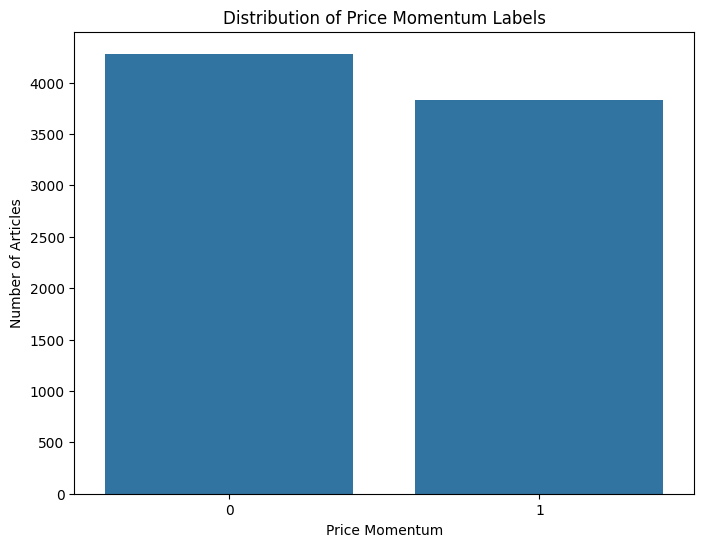

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of price momentum labels
plt.figure(figsize=(8, 6))
sns.countplot(x='price_momentums', data=full_dataset)
plt.title('Distribution of Price Momentum Labels')
plt.xlabel('Price Momentum')
plt.ylabel('Number of Articles')
plt.show()


#### Interpretation of Price Momentum Label Distribution

The bar chart presents a nearly balanced distribution between articles associated with negative (0) and positive (1) price momentum, indicating a healthy variety in the dataset for both market movement scenarios. This balance is beneficial for modeling as it reduces the risk of bias towards a particular class and suggests that the dataset may not require resampling strategies typically used to correct imbalances.


#### Article Length Analysis

Next, we delve into the lengths of the news articles. Understanding the relationship between article length and price momentum can provide insights into how the detail level of news affects market movements.


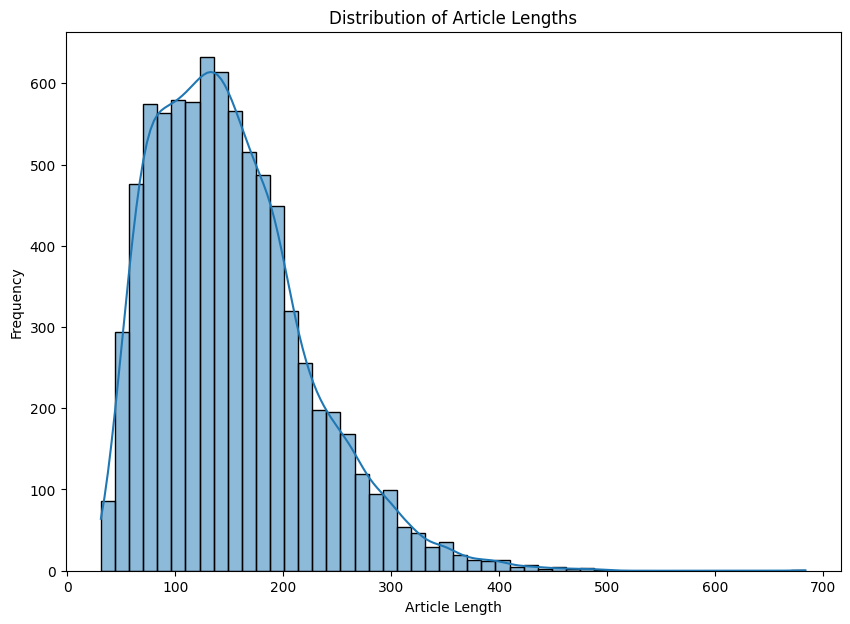

In [7]:
# Calculating article lengths
full_dataset['article_length'] = full_dataset['text'].apply(len)

# Plotting the distribution of article lengths
plt.figure(figsize=(10, 7))
sns.histplot(full_dataset['article_length'], bins=50, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Article Length')
plt.ylabel('Frequency')
plt.show()


#### Interpretation of Article Length Distribution

The histogram reveals that the article lengths in our dataset typically follow a normal distribution, with most articles clustering around a central length value. This suggests a standardization in news article length, with outliers being very long or very short articles.


#### Article Length vs. Price Momentum

To further our understanding, we will now examine if there's a correlation between the lengths of articles and price momentum. By plotting article lengths against price momentum labels, we aim to discover whether shorter or longer articles tend to be associated with either negative or positive market movements. This could reveal if the amount of information provided in an article has any apparent effect on the sentiment of market trends.


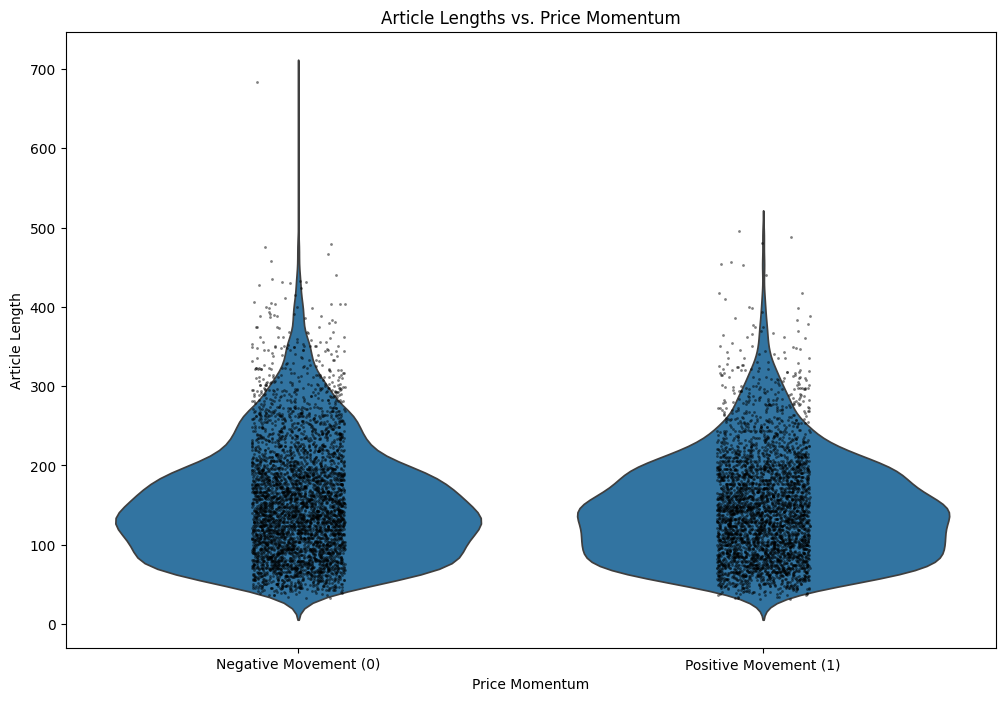

In [8]:
plt.figure(figsize=(12, 8))  
sns.violinplot(x='price_momentums', y='article_length', data=full_dataset, inner=None)
sns.stripplot(x='price_momentums', y='article_length', data=full_dataset, 
              size=2, jitter=True, color='k', alpha=0.5)  
plt.title('Article Lengths vs. Price Momentum')
plt.xlabel('Price Momentum')
plt.ylabel('Article Length')
plt.xticks([0, 1], ['Negative Movement (0)', 'Positive Movement (1)'])
plt.show()


#### Interpretation of Article Lengths vs. Price Momentum

The violin plot illustrates that the lengths of articles with negative and positive price momentum are similarly distributed, with a wide base and a thin tail, indicating a large concentration of articles around the median length. Both categories show a range of lengths from short to quite extensive, with outliers present in each. The similarity in distribution suggests that there is no significant difference in article lengths between the two categories of price momentum.


#### Common Words and Phrases

To uncover the dominant themes and topics in the cryptocurrency news, we'll identify the most frequent words and phrases. A word cloud visualization will help illustrate these common elements, offering a visual representation of the dataset's content focus.


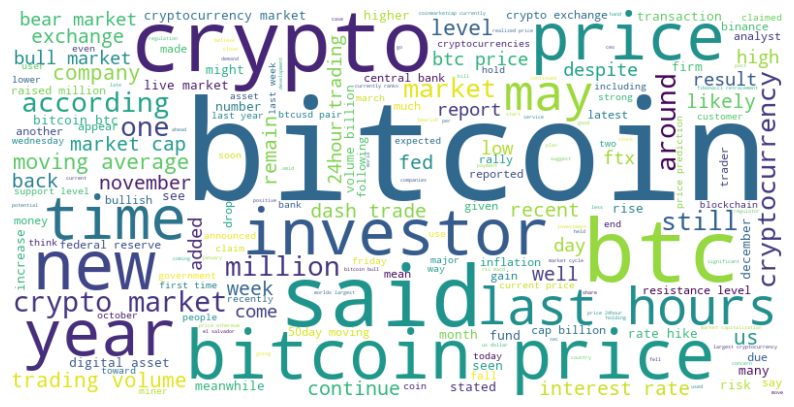

In [9]:
from wordcloud import WordCloud

# Joining all text to create a word cloud
all_text = ' '.join(full_dataset['text'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_text)

# Displaying the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#### Interpretation of the Word Cloud

The word cloud visually emphasizes the most frequent terms in our cryptocurrency news dataset. Prominent words like 'bitcoin', 'price', 'crypto', 'market', and 'investor' suggest a strong focus on market dynamics and investment trends. The size of the words 'bitcoin' and 'price' indicates their dominance, potentially reflecting the dataset's emphasis on pricing information and Bitcoin-related news.


#### Temporal Trends

Finally, we'll investigate the publication dates of the articles to discern any temporal patterns. This analysis aims to reveal trends in news volume and its correlation with price momentum, potentially highlighting periods of heightened market activity.


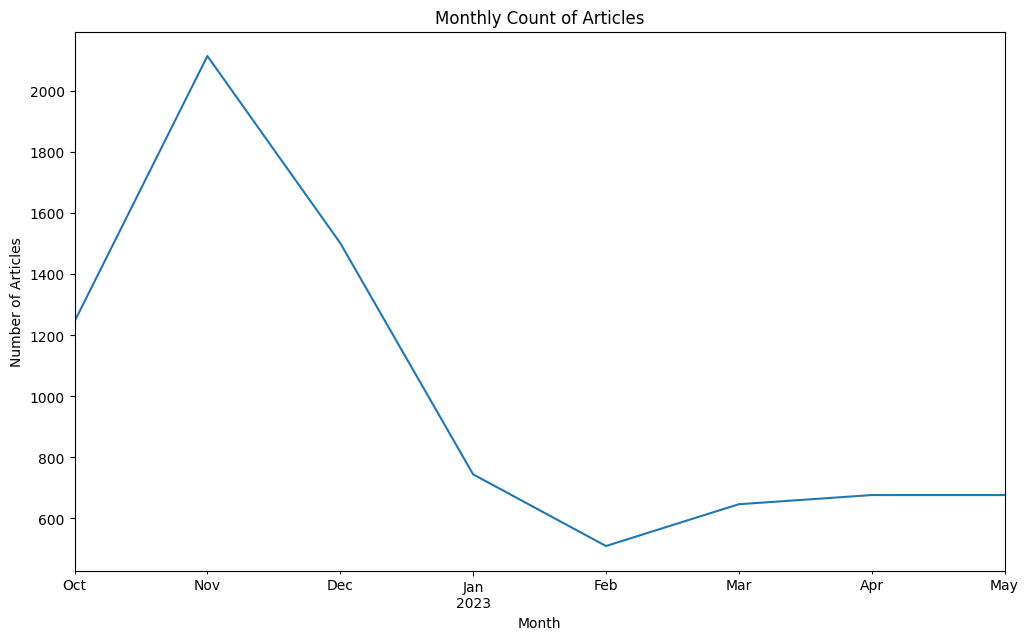

In [10]:
# Converting datetime to pandas datetime format
full_dataset['datetime'] = pd.to_datetime(full_dataset['datetime'])

# Setting the datetime as the index
full_dataset.set_index('datetime', inplace=True)

# Resampling to get monthly counts of articles
monthly_articles = full_dataset.resample('M')['text'].count()

# Plotting the monthly article counts
plt.figure(figsize=(12, 7))
monthly_articles.plot(kind='line')
plt.title('Monthly Count of Articles')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.show()


#### Interpretation of Monthly Count of Articles

The line graph displays a pronounced peak in the number of articles during November, followed by a sharp decline in December and a plateau from January onwards. This spike may indicate increased reporting due to specific market events or seasonal trends. The subsequent steady state suggests a normalization in news volume post-event.


#### News Volume vs. Price Momentum Trends

To investigate any potential correlation between the volume of news articles and market trends, we will plot the average price momentum alongside the monthly count of articles. This comparison may reveal if a greater or lesser frequency of news is associated with positive or negative market movements.


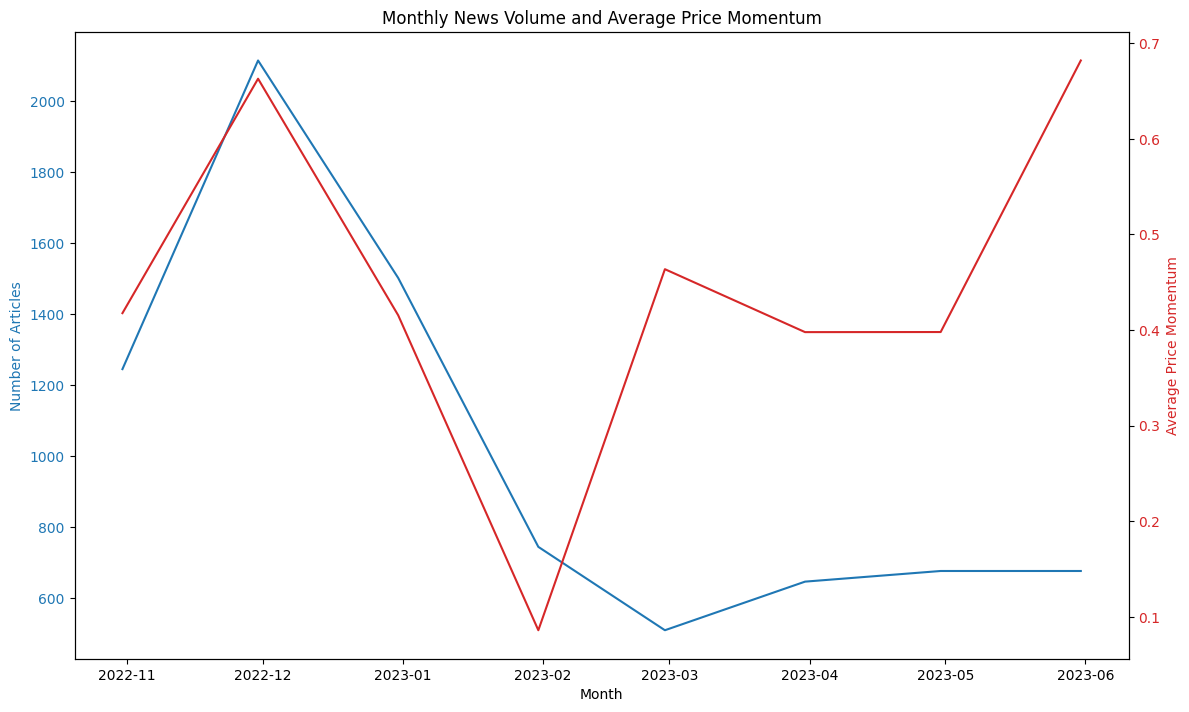

In [11]:
import matplotlib.pyplot as plt

# Grouping the data by month and calculating the mean price momentum
monthly_momentum = full_dataset.resample('M')['price_momentums'].mean()

# Plotting the monthly count of articles
fig, ax1 = plt.subplots(figsize=(12, 7))

color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Articles', color=color)
ax1.plot(monthly_articles.index, monthly_articles, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a twin axis to plot the price momentum
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Price Momentum', color=color)  
ax2.plot(monthly_momentum.index, monthly_momentum, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Monthly News Volume and Average Price Momentum')
plt.show()


#### Interpretation of Monthly News Volume and Average Price Momentum

The dual-axis line chart depicts a significant correlation between the volume of news articles and average price momentum. Notably, as the number of articles peaked in November, the price momentum simultaneously showed a marked increase. This suggests that heightened news activity could be linked to positive market movements. Post-November, as news volume sharply decreased, price momentum also dropped, reinforcing the potential relationship between news coverage and market trends. However, a divergence is observed from March onwards, where a decrease in news volume coincides with a rising price momentum, indicating that other factors may also influence market behavior.


### Summary of Exploratory Data Analysis

Our exploratory data analysis has provided several insights:

- **Price Momentum Distribution**: The dataset contains a balanced number of articles for both positive and negative price momentum, suitable for model training without bias.

- **Article Length Patterns**: The lengths of articles generally follow a normal distribution, with some articles significantly longer or shorter than the average.

- **Key Terms**: Words such as 'bitcoin', 'price', 'crypto', and 'market' appear frequently, indicating these topics are central in the cryptocurrency news.

- **News Volume Over Time**: An increase in the number of articles in November correlates with a rise in price momentum, suggesting news output may influence market trends.

- **News Volume and Momentum Relationship**: The comparison of article volume with price momentum shows a relationship, especially during periods of high news activity.

These findings inform the next stages of our project, particularly feature engineering and the development of a model to predict market movement based on news content.


### Transition to Feature Engineering

Having completed our exploratory analysis, we will now proceed to the next phase of the project: feature engineering. This will be conducted in a new Jupyter Notebook titled `ML_CryptoNews_FE`, where we will develop and refine features that will be used to build our machine learning models.
